# Project: Investigate noshowappointments-kagglev2-may-2016.csv

## Table of Contents

#### Introduction 

#### Data Wrangling 

#### Exploratory Data Analysis 

#### Conclusions 

## Introduction

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### Dataset Description

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question for Analysis 

1) How many person make it to the appointment?

2) How many gender went for the appointment?

3) Statistic of Noshow column base on their Ages?

In [1]:
# Import package librarys

import pandas as pd  # used for data wrangling
import numpy as np  # used for data manipulation and calculation
import seaborn as sns  # used for visualizations
import matplotlib.pyplot as plt  # used for visualization
%matplotlib inline 

## Data wrangling

In [2]:
# Load the dataset using pandas in csv format
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
# data inspecting by printing the first five rows 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# data inspecting by printing the last five rows of the dataset
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# find the number of rows and columns of the dataset
df.shape

(110527, 14)

We have 110527 observations i.e rows and 14 features i.e columns in the dataset

In [6]:
# Inspecting datatypes and possible errand data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


All the columns is correctly assign to its datatypes

In [7]:
# Looking for Missing Values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing values as shown above

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The maximum Handcap is 4

The maximum Age is approximate 115

In [9]:
# Checking Age column with -1 value
mask1 = df[df["Age"] == -1]
mask1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
# Checking for duplicate
df.duplicated().sum()

0

No duplicates in the dataset

### Data Cleaning 

In [11]:
# Write a function that print the first five rows of the Age column
def age():
    print(df["Age"].head())
age()    

0    62
1    56
2    62
3     8
4    56
Name: Age, dtype: int64


The function print out the first five rows of the Age column

In [12]:
# Treating the Age column with -1 value
df.drop(index=99832, inplace=True)

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
# Create a new 'No_show' columns from 'No-show'
df["No_show"] = df["No-show"]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No


In [15]:
# Dropping some columns in the dataset
df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "No-show"], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# Columns 'Hipertension' and Alcoholism spelling in the dataset
df.rename(columns={"Alcoholism": "Alcoholic", "Hipertension": "Hypertension"}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholic,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
# Using groupby function on Gender column
df.groupby("Gender").mean()

,Age,Scholarship,Hypertension,Diabetes,Alcoholic,Handcap,SMS_received
Gender,,,,,,,
F,38.894542,0.123234,0.213519,0.078036,0.017024,0.019544,0.336892
M,33.736863,0.051904,0.167033,0.060408,0.055238,0.027270,0.291571


This shows that about 33% mean of the female received SMS_received while

About 29% mean of the male received SMS_received.

## Exploratory Data Analysis

###  Complete Observation (EDA)

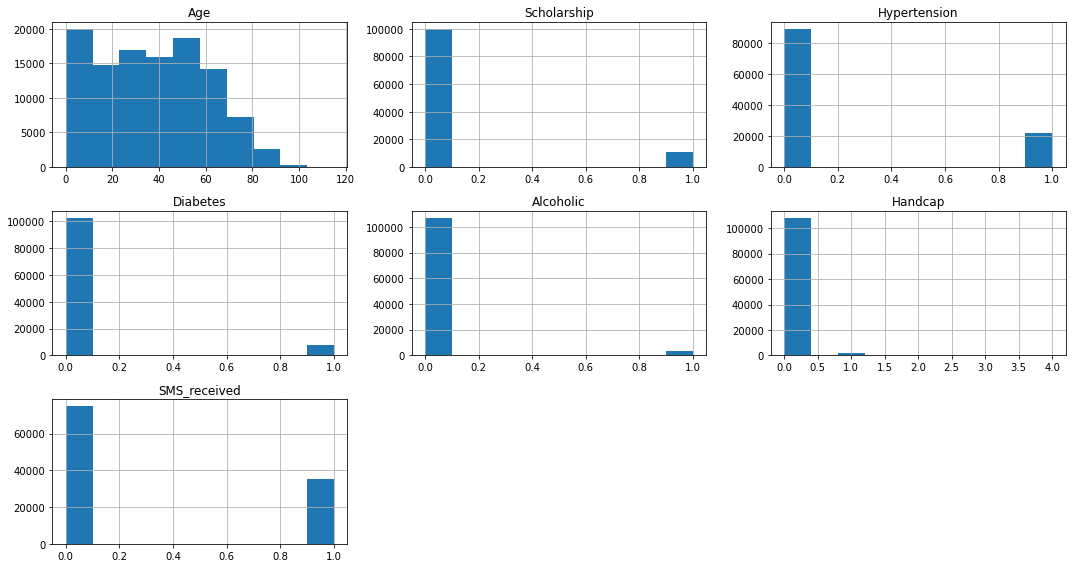

In [18]:
# Create a histogram of the entire dataset
df.hist(figsize=(15,8));
plt.tight_layout()

About 10000 out of 110000 patient got the scholarship which is approximately 10%

Approximately 38000 out of 110000 patient was sent SMS message

### Research Question 1 (How many person make it to the appointment!)

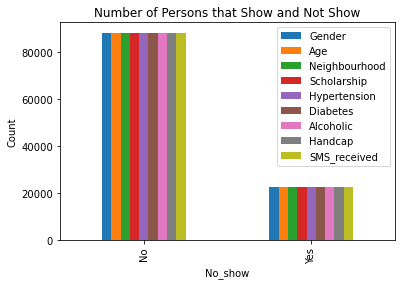

In [19]:
df.groupby("No_show").count().plot(kind="bar")
plt.xlabel("No_show")
plt.ylabel("Count")
plt.title("Number of Persons that Show and Not Show");

In [20]:
# Filtering 'No_show' columns
Show = df["No_show"] == "No"
Noshow = df["No_show"] == "Yes"

In [21]:
df[Show].count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholic        88207
Handcap          88207
SMS_received     88207
No_show          88207
dtype: int64

In [22]:
df[Noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholic        22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

### Observations and findings

1) The plot shows that out of over one hundred and ten thousand persons only twenty two thousand, three hundred and nineteen (22319) persons did not show for the appointment and over eighty eight thousand (88208) make it to the appointment

## Research Question 2 (How many gender went for the appointment!)

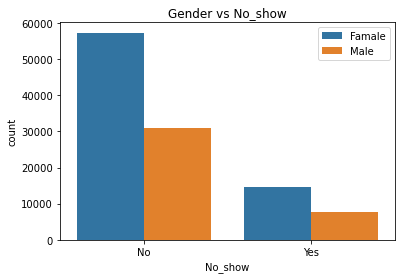

In [24]:
label=["Famale", "Male"]
sns.countplot(x="No_show", hue="Gender", data=df)
plt.title("Gender vs No_show")
plt.legend(label);

### Observations and findings

1) they are more of Female than Male in the Gender column

2) Over Fifty seven thousand Female show for the appointment while over thirty thousand male make it to the appointment

3) Over fourteen thousand Female did not show for the appointment while over seven thousand Male did not show for the appointment

## Research Questions 3 (Statistic of Noshow column base on their Ages!)

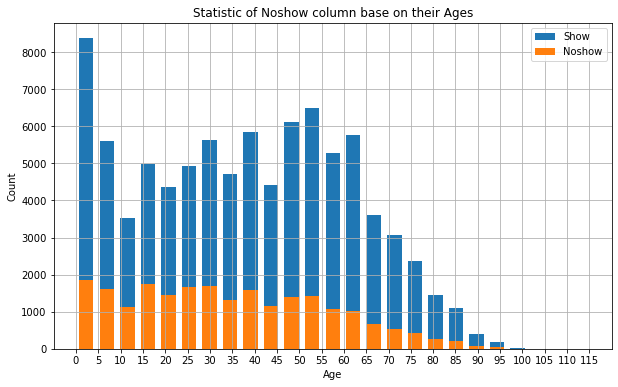

In [25]:
df["Age"][Show].hist(label="Show", rwidth=0.7, bins=25, figsize=(10,6))
df["Age"][Noshow].hist(label="Noshow", rwidth=0.7, bins=25, figsize=(10,6))
plt.xticks(np.arange(0, 115+5, 5))
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Statistic of Noshow column base on their Ages");

In [26]:
df["Age"][Noshow].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

### Observation and findings 

This shows that younger patient tend to show for the appointment.

The older patient are mostly not present for the appointment.

## Research Question 4 (Comparison of the No_show column base on their neighborhood)

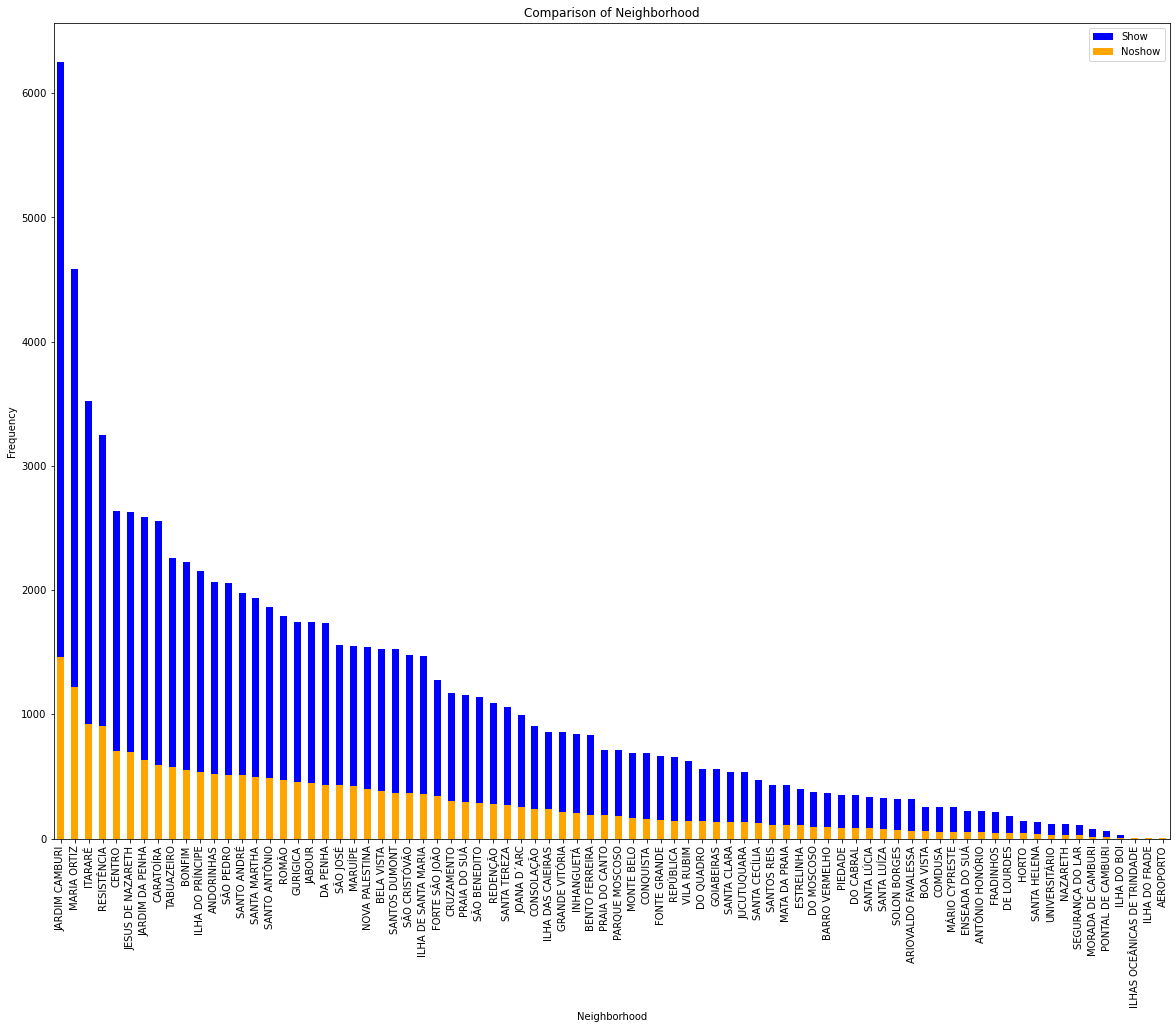

In [27]:
fig = plt.figure(figsize=(20,15))
df.Neighbourhood[Show].value_counts().plot(kind="bar", color="blue", label="Show")
df.Neighbourhood[Noshow].value_counts().plot(kind="bar", color="orange", label="Noshow")
plt.xlabel("Neighborhood")
plt.ylabel("Frequency")
plt.title("Comparison of Neighborhood")
plt.legend();

### Observation and Findings

They JARDIM CAMBURI Neighbourhood has the highest number of patient while

In [28]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

# Conclusion

More younger or average patient show for the appointment

Female gender show more for the appointment than male gender

Only 22319 out of 110527 did not show for the appointment

### Limitations

There is no correlation between most of the diseases and the gender column